Mini Project- Leptops 
Peleg Abraham-Oz 211698196

This is my mini-project
I teached myself seaborn because I needed this to a work in the lub that Im working for, so I used it here too.
Have a nice checking!

In [34]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
FILE_NAME = 'laptop_price - dataset.csv'
try:
    df = pd.read_csv(FILE_NAME, encoding='latin-1')
    print("data set load!")
except FileNotFoundError:
    print(f"Error: the file{FILE_NAME} was not found ")
    

data set load!


mission 1
Plot the price of all the laptops at histogram graph
in the second part I calculate the results for each company and print it


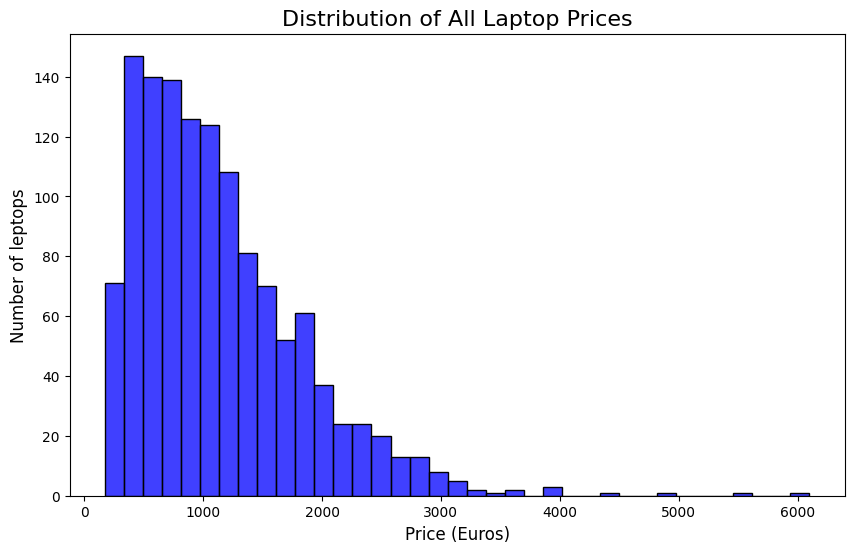

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (Euro)'],color='blue')
plt.title('Distribution of All Laptop Prices', fontsize=16)
plt.xlabel('Price (Euros)', fontsize=12)
plt.ylabel('Number of leptops', fontsize=12)
plt.show()

In [38]:
#Average per company 
avg_price_per_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

print("Average price per company:")
print(avg_price_per_company)

most_expensive_company = avg_price_per_company.idxmax()
highest_avg_price = avg_price_per_company.max()

print(f"Answer: The company with the most expensive laptops on average is: {most_expensive_company} ({highest_avg_price:.2f} Euros)")

Average price per company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64
Answer: The company with the most expensive laptops on average is: Razer (3346.14 Euros)


In missions 3+4 I first checked the options for the OpSys and then gave the options.
Then I made a couple of graphs by the number of the OpSys that I calculate.

In [39]:
#Mission 3
print("OpSys before fix:", df['OpSys'].unique())

def classify_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'macOS'
    elif inp == 'Linux':
        return 'Linux'
    elif inp == 'Android':
        return 'Android'
    elif inp == 'Chrome OS':
        return 'Chrome OS'
    else:
        return 'Other/No OS' # Chrome OS, Android, No OS

df['OpSys'] = df['OpSys'].apply(classify_os)

print("OpSys after fix:", df['OpSys'].unique())

OpSys before fix: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
OpSys after fix: ['macOS' 'Other/No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


<Figure size 1500x1000 with 0 Axes>

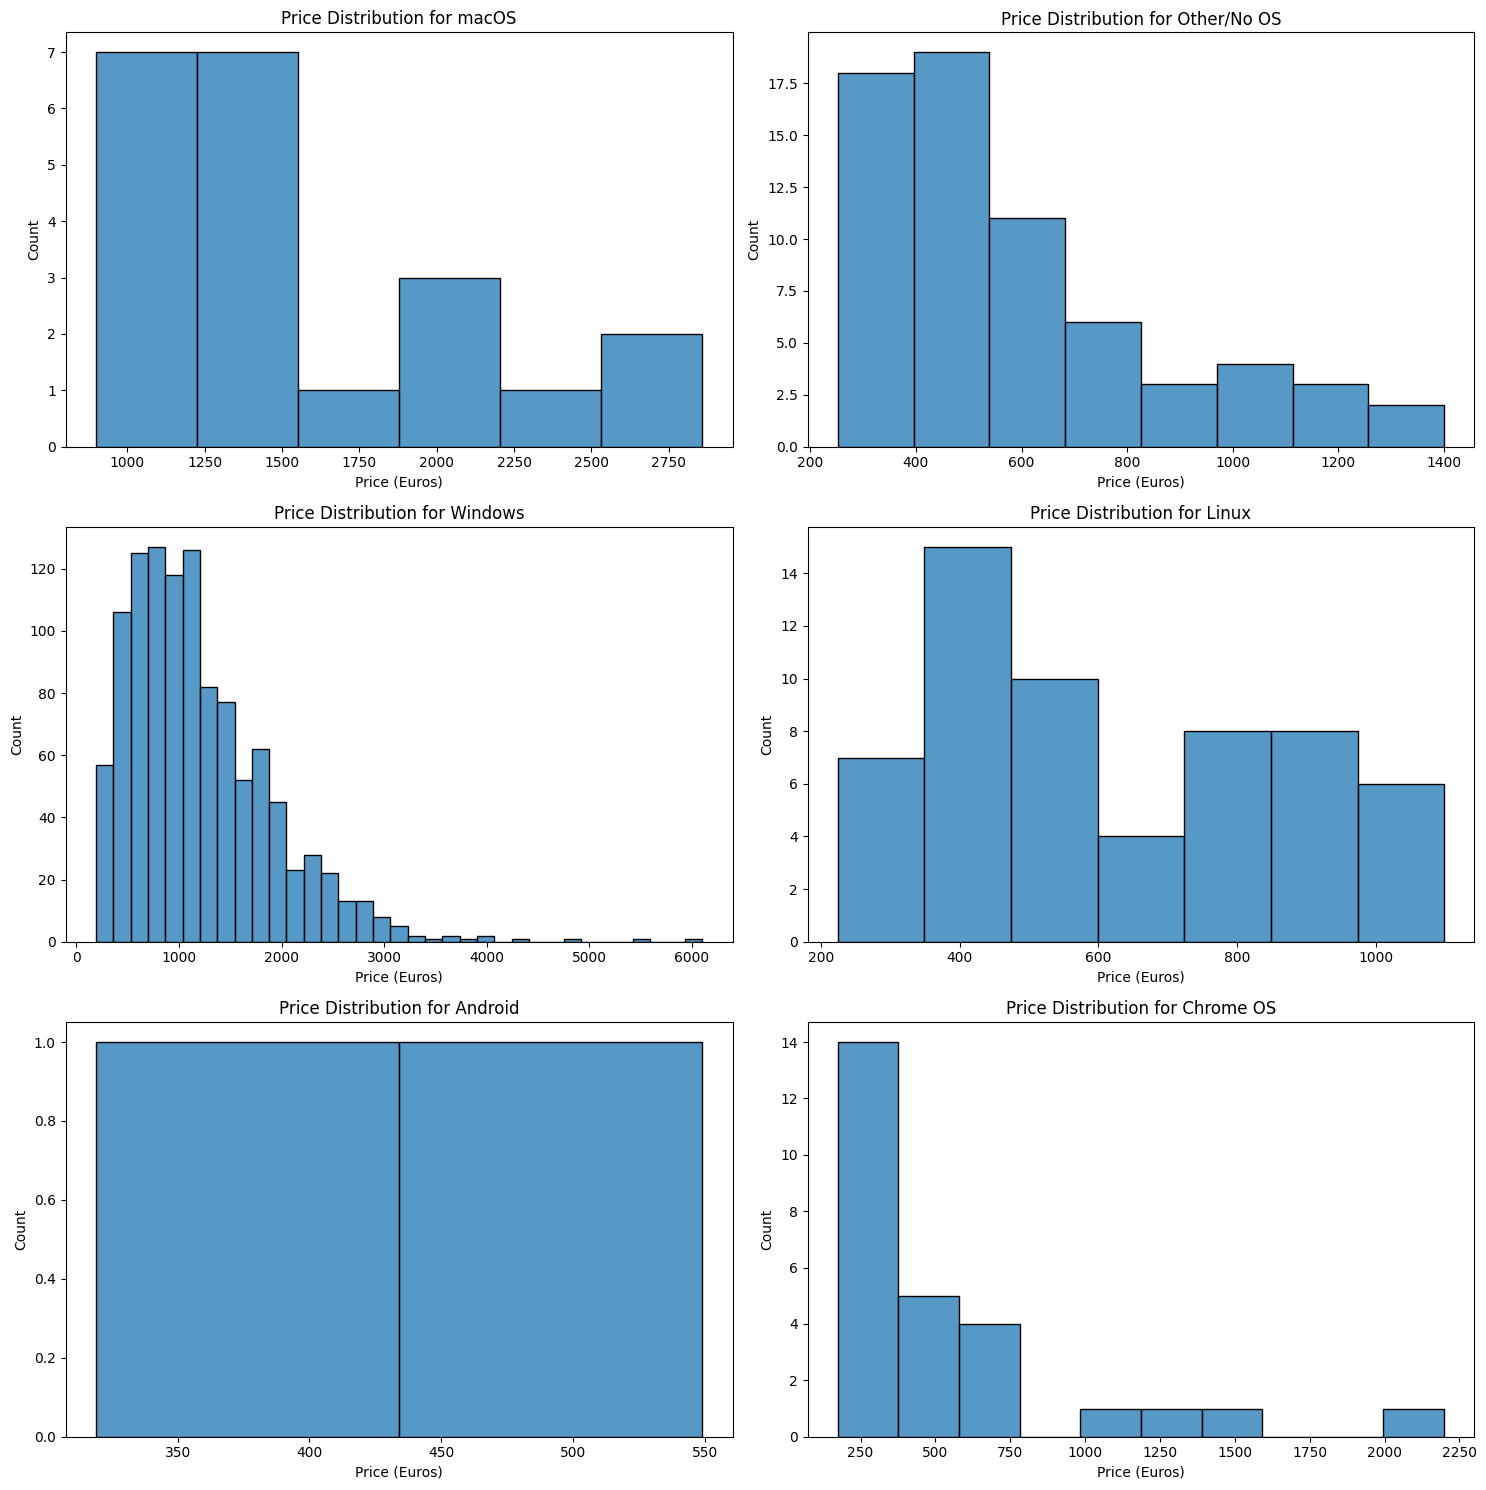

In [40]:
#Mission 4- plots
unique_os = df['OpSys'].unique()
num_plots= len(unique_os)
plt.figure(figsize=(15, 10))
cols_for_plots=2
rows_for_plots= num_plots/cols_for_plots 
plt.figure(figsize=(15, 5*rows_for_plots))
for i, os in enumerate(unique_os):
    plt.subplot(int(rows_for_plots),cols_for_plots, i+1) 
    subset = df[df['OpSys'] == os]
    sns.histplot(subset['Price (Euro)'])
    plt.title(f'Price Distribution for {os}')
    plt.xlabel('Price (Euros)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


mission 5: outliers for price+RAM
 Methodology:To detect outliers in the Price/RAM data, I used the IQR (Interquartile Range) Method. 
 This is a standard statistical.I calculated 25 percentile and 75 percentile then, I defined the IQR as 75% -25%. Boundaries: Any data point below 25% - 1.5 \times IQR or above 75% + 1.5 \times IQR is considered an outlier.
  The calculated lower bound was negative (e.g., $-722$). Since prices and RAM cannot be negative, this mathematically indicates that there are no outliers on the lower end and I put 0.
  

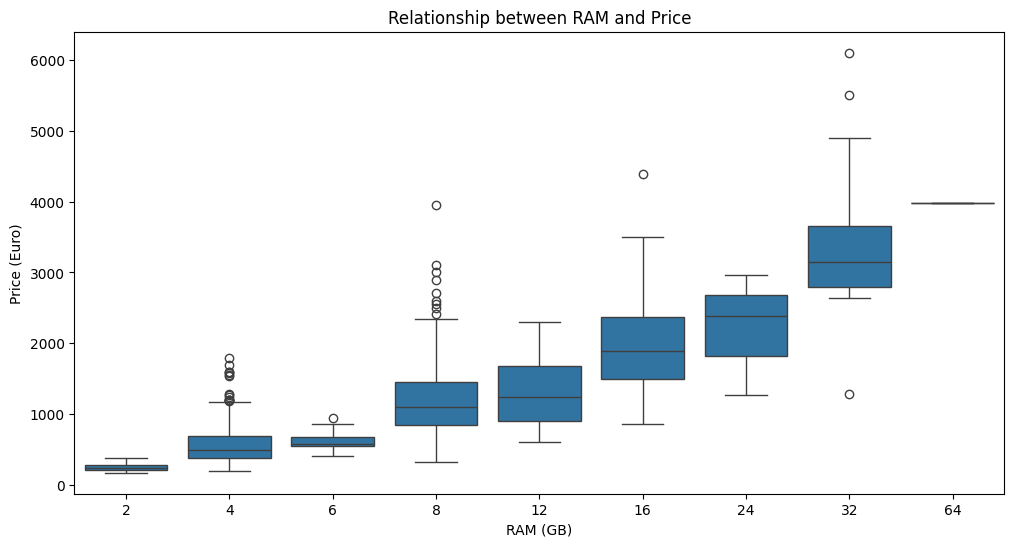

Outlier boundaries- High: 2827.75, Low: 0.00


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='RAM (GB)', y='Price (Euro)', data=df)
plt.title('Relationship between RAM and Price')
plt.show()
Q1 = df['Price (Euro)'].quantile(0.25)
Q3 = df['Price (Euro)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
if lower_bound<0:#for the case the resutl is minus
    lower_bound=0
upper_bound = Q3 + 1.5 * IQR
print(f"Outlier boundaries- High: {upper_bound:.2f}, Low: {lower_bound:.2f}")
